# Lab 6 - Image matching via local feature detection

The goal of this lab is to experiment with image matching via local feature detection.

## Goal: Image matching using local features

In this notebook, I have provided code for 1) corner detection and 2) SIFT feature computation.  You will be using SIFT features to compute a match score between two images.  Details are provided below.

Please __Submit via Blackboard__.

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import scipy as sp
%matplotlib inline

### Test Image

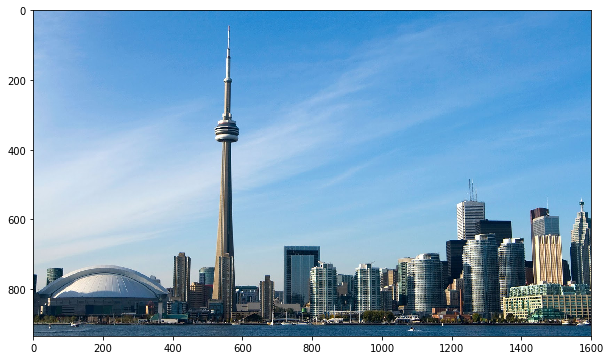

In [2]:
img_file = 'cn-tower-1.jpg'
#img_file = 'cb.png'

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

### Finding interest points using Harris Corner Detector

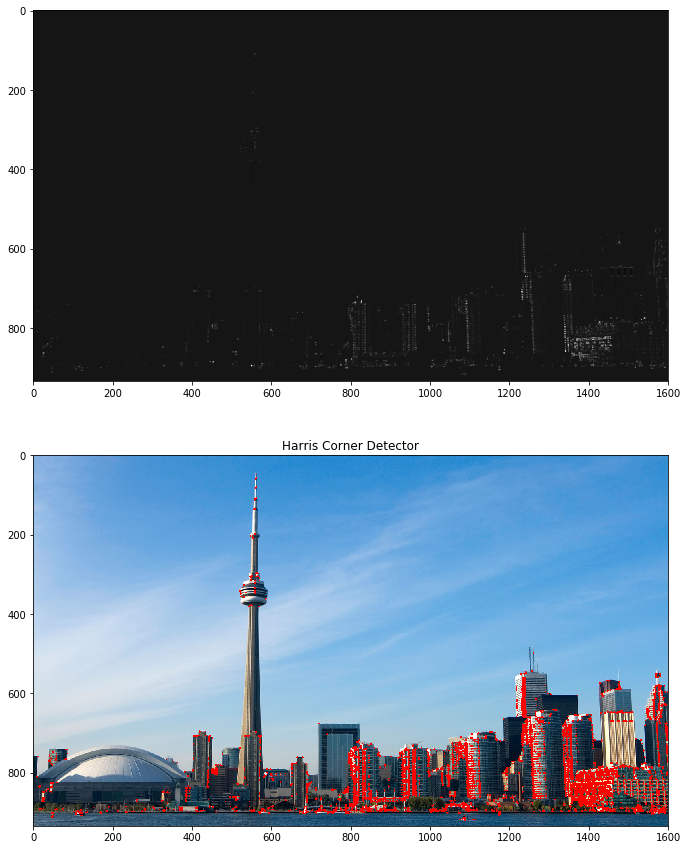

In [3]:
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
src = np.float32(src)

blocksize = 2 # size of the neighbourhood considered for corner detection
ksize = 3 # size of the Sobel kernel (a.k.a. the aperture parameter of the Sobel derivative)
k = 0.04 # Harris detector parameter used in the corner response equation $R = det(M) - k (trace(M))^2$
dst = cv2.cornerHarris(src, blocksize, ksize, k)
dst = cv2.dilate(dst, None)
img[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(20,15))
plt.title('Harris Corner Response')
plt.subplot(2,1,1)
plt.imshow(dst, cmap='gray')
plt.subplot(2,1,2)
plt.title('Harris Corner Detector')
plt.imshow(img)

### Finding interest points using Shi-Tomasi Corner Detector

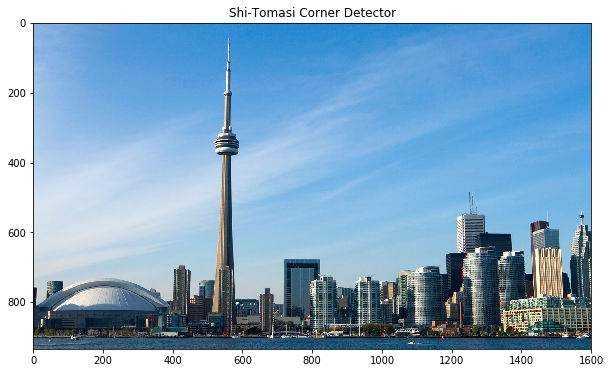

In [4]:
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

corners = cv2.goodFeaturesToTrack(src, 25, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.figure(figsize=(10,10))
plt.title('Shi-Tomasi Corner Detector')
plt.imshow(img)

### SIFT

The following code identifies the locations (stored as cv2.Keypoint) that are suitable for SIFT computation.  An orientation and scale is associated with each location.

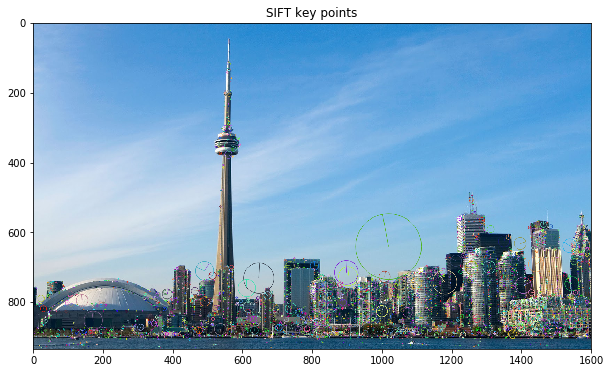

In [5]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import scipy as sp
%matplotlib inline

img_file = 'cn-tower-1.jpg'

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT()

src = np.uint8(src)
kp = sift.detect(src, None)

# Given these keypoints we are able to compute the SIFT descriptors
# at these keypoints as follows
#
# Below des is a (n x 128) numpy array, whose each row contains a SIFT
# descriptor
kp, des = sift.compute(src, kp)

# We draw the keypoint alongwith their scale and orientation
# for better visualization
src = cv2.drawKeypoints(img, kp, 0, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title('SIFT key points')
plt.imshow(src)

### TODO

Your goal is to use local feature descriptors computed from two images to compute a match score for these images.  Here's the a recipie for computing a match score.

1. Compute $n$ SIFT descriptors from image 1
2. Compute $m$ SIFT descriptors from image 2
3. _Each descriptor is a 128-dimenstional vector.  So find a scheme to compute distance between two vectors---say, Euclidean distance.  Also identify a suitable threshold that you can use to decide if two vectors are "matched._
 Now using the distance computating above, find the number of matched vectors between the vectors computed from image 1 and those computed from image 2.  
4. Find the percentage of matched vectors w.r.t. to the the number of vectors computed from the image 1 or image 2.  Use image 1 number, if $n$ is smaller than $m$, image 2 numbers otherwise.

__Complete the following function__ which returns a number between 0.0 and 1.0

In [47]:
def img_match(filename1, filename2):
    
    img1 = cv2.imread(filename1, 0)
    img2 = cv2.imread(filename2, 0)
    
    sift = cv2.SIFT()
    
    kp1 = sift.detect(img1, None)
    kp2 = sift.detect(img2, None)
    
    kp1, des1 = sift.compute(img1, kp1)
    kp2, des2 = sift.compute(img2, kp2)
      
        
    if len(des1) > len(des2):
        arg1 = des1
        arg2 = des2
    else:
        arg1 = des2
        arg2 = des1
        
    matched = 0
    for i in range(0, len(des1)):
        d = []  
        for j in range(0, len(des2)):
            d.append(np.sqrt(np.sum(des1[i] - des2[j]) ** 2))
        d.sort()
        threshold = 0.7
        if (d[1] == 0):
            matched = matched + 1
        elif (d[0] / d[1]) < threshold:
            matched = matched + 1
    
    if len(des1) > len(des2):
        result = matched / float(len(des1))
    else:
        result = matched / float(len(des2))

    return matched / float(len(des1))

We will use this function as follows

Match score is 0.741967052683


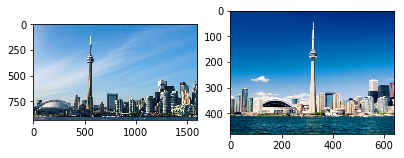

In [41]:
filename1 = 'cn-tower-1.jpg'
filename2 = 'cn-tower-2.jpg'

img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)


print 'Match score is', img_match(filename1, filename2)

Match score is 0.760252365931


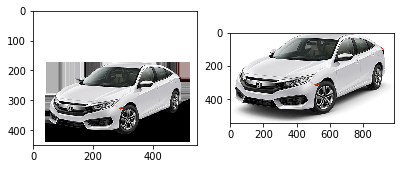

In [48]:
filename1 = 'honda-1.png'
filename2 = 'honda-2.jpg'

img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)

print 'Match score is', img_match(filename1, filename2)

Match score is 0.00456695481977


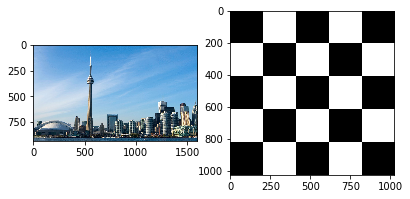

In [43]:
filename1 = 'cn-tower-1.jpg'
filename2 = 'cb.png'

img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)

print 'Match score is', img_match(filename1, filename2)

 Match score is 0.620290327842


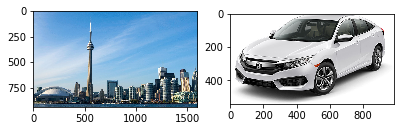

In [56]:
filename1 = 'cn-tower-1.jpg'
filename2 = 'honda-2.jpg'

img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)

print 'Match score is', img_match(filename1, filename2)

Match score is 0.72011091176


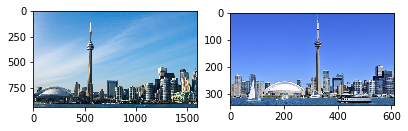

In [57]:
filename1 = 'cn-tower-1.jpg'
filename2 = 'cn-tower-3.jpg'

img1 = cv2.imread(filename1)
img2 = cv2.imread(filename2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)

print 'Match score is', img_match(filename1, filename2)